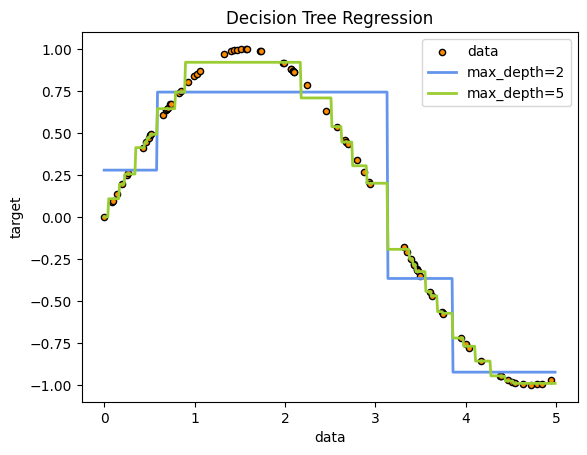

In [113]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
#y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [114]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

device = torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu')


class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, output_dim),
            nn.ReLU(),
            nn.Linear(output_dim, output_dim),
            nn.ReLU(),
            nn.Linear(output_dim, output_dim),
            nn.ReLU(),
            nn.Linear(output_dim, 1),
        )
    
    def forward(self, x):
        out = self.model(x)
        return out

# Create a random dataset
rng = np.random.RandomState(1)
X = np.random.rand(10**5) * 2 * np.pi
y = np.sin(X).ravel()

X_train, X_val, y_train, y_val = map(torch.tensor, train_test_split(X, y, test_size=0.2))
train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=64, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=64, pin_memory=True, shuffle=True)

model = LinearModel(1, 2048).to(device)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

for epoch in range(10):
    for train, expected in train_dataloader:
        train = train.type(torch.float32).to(device)
        expected = expected.type(torch.float32).to(device)

        optimizer.zero_grad()

        y_pred = model(train)
        loss = criterion(y_pred, expected)
        loss.backward()
        optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))
        
X_test = np.arange(0.0, 2*np.pi, 0.01)[:, np.newaxis]
y_1 = model(torch.from_numpy(X_test).float().to(device)).detach().cpu().numpy()

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="model", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("AI Model Regression")
plt.legend()
plt.show()

epoch 0, loss 0.06391988694667816
epoch 1, loss 0.01646435260772705


KeyboardInterrupt: 